In [2]:
import pandas as pd
import numpy as np
dataset = "Google.csv"
d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')
df = pd.read_csv(dataset, parse_dates=['Date'], date_parser =d_parser)

<ipython-input-2-630770afa742>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')


In [3]:
df['day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000,19
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,20
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,23
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,24
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,25


In [5]:
filt = (df['Date'] >= pd.to_datetime('2018-1-1')) & (df['Date'] < pd.to_datetime('2018-1-31'))
new_df = df.loc[filt]

In [6]:
new_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day
3366,2018-01-02,1053.020020,1075.979980,1053.020020,1073.209961,1073.209961,1588300,2
3367,2018-01-03,1073.930054,1096.099976,1073.430054,1091.520020,1091.520020,1565900,3
3368,2018-01-04,1097.089966,1104.079956,1094.260010,1095.760010,1095.760010,1302600,4
3369,2018-01-05,1103.449951,1113.579956,1101.800049,1110.290039,1110.290039,1512500,5
3370,2018-01-08,1111.000000,1119.160034,1110.000000,1114.209961,1114.209961,1232200,8


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 3366 to 3385
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       20 non-null     datetime64[ns]
 1   Open       20 non-null     float64       
 2   High       20 non-null     float64       
 3   Low        20 non-null     float64       
 4   Close      20 non-null     float64       
 5   Adj Close  20 non-null     float64       
 6   Volume     20 non-null     int64         
 7   day        20 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 1.4 KB


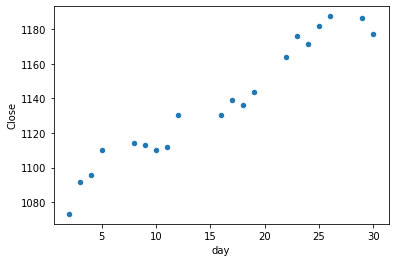

In [8]:
new_df.plot(kind='scatter', x='day', y='Close')

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [8]:
model.fit(new_df[['day']], new_df[['Close']])

LinearRegression()

In [9]:
intercept = model.intercept_
print(intercept)

[1077.90335027]


In [10]:
coefficient = model.coef_
print(coefficient)

[[3.79231047]]


In [11]:
predictions = model.predict(new_df[['day']])

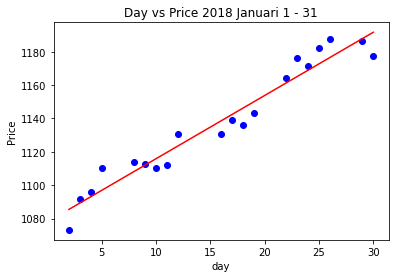

In [18]:
import matplotlib.pyplot as plt
plt.xlabel('day')
plt.ylabel('Price')
plt.title('Day vs Price 2018 Januari 1 - 31')
plt.scatter(new_df[['day']],new_df[['Close']], color = 'blue')
plt.plot(new_df.day, predictions, color ='red')
plt.show()

In [13]:
model.score(new_df[['day']], new_df[['Close']])

0.9443753105808659

In [17]:
model.predict([[32]])

array([[1199.25728526]])